In [6]:
#1. Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
##1. Load data in Pandas.
##2. Drop columns that aren’t useful.
##3. Drop rows with missing values.
##4. Create dummy variables.
##5. Take care of missing data.
##6. Convert the data frame to NumPy.
##7. Divide the data set into training data and test data.
##write this as numpy coment

In [1]:
import pandas as pd
data=pd.read_csv('hepatitis_csv.csv')
columns_to_drop = ['age', 'sex']
data = data.drop(columns=columns_to_drop)
print("Dropped age and sex column")



Dropped age and sex column


In [2]:
data_cleaned=data.dropna()

print("Original data:",data.shape)
print("Cleaned data:", data_cleaned.shape)


Original data: (155, 18)
Cleaned data: (80, 18)


In [3]:
categorical_column='liver_big'
dummy_variables=pd.get_dummies(data[categorical_column],prefix=categorical_column)
data_with_dummies=pd.concat([data,dummy_variables],axis=1)
data_with_dummies.drop(columns=[categorical_column], inplace=True)
print(data_with_dummies.head())

  steroid  antivirals fatigue malaise anorexia liver_firm spleen_palpable  \
0   False       False   False   False    False      False           False   
1   False       False    True   False    False      False           False   
2    True       False    True   False    False      False           False   
3     NaN        True   False   False    False      False           False   
4    True       False   False   False    False      False           False   

  spiders ascites varices  bilirubin  alk_phosphate   sgot  albumin  protime  \
0   False   False   False        1.0           85.0   18.0      4.0      NaN   
1   False   False   False        0.9          135.0   42.0      3.5      NaN   
2   False   False   False        0.7           96.0   32.0      4.0      NaN   
3   False   False   False        0.7           46.0   52.0      4.0     80.0   
4   False   False   False        1.0            NaN  200.0      4.0      NaN   

   histology class  liver_big_False  liver_big_True  
0 

In [12]:
data=data.dropna()
data

,StudyTime,Score
0,6.243562,14.904693
1,14.310000,36.588841
2,11.247915,27.424661
3,9.381219,22.754452
4,3.184261,8.323596
5,3.183923,5.089888
6,1.813171,1.945550
7,13.126466,31.972734
8,9.415610,22.019779
9,10.913016,27.753911


In [13]:
numpy_data=data.to_numpy()
print("Converted to Numpy")

Converted to Numpy


In [14]:
from sklearn.model_selection import train_test_split
x = numpy_data[:, :-1]  
y = numpy_data[:, -1]    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Divided data into training data and test data")

Divided data into training data and test data


In [15]:
#2. Consider the hepatitis/ diabetes csv file, create the regression model display the co-efficients (B0-intercept
#and B1-Slope), RMSE and predict the response. Plot the graph x v/s y in yellow and x v/s prediction in green.

Intercept: 58.51105577561223
Slope: [0.09178267]
RMSE: 18.895013732107603


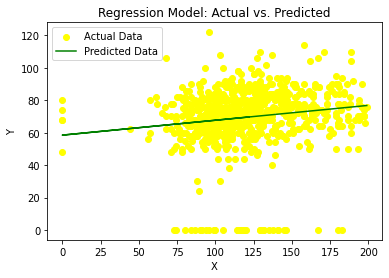

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data2 = pd.read_csv('diabetes_csv.csv')

x = data2['Glucose']
y = data2['BloodPressure']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Reshape the input arrays
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(x_train, y_train)

intercept = model.intercept_
slope = model.coef_
print("Intercept:", intercept)
print("Slope:", slope)

y_pred = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

plt.scatter(x, y, color='yellow', label='Actual Data')
plt.plot(x_test, y_pred, color='green', label='Predicted Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Model: Actual vs. Predicted')
plt.legend()
plt.show()


In [8]:
#1. Construct a training data of CSV file with attributes(Study-time in hours of ML lab course (x), Score out of
#10 (y)) of 10 rows. Create the regression model display the co-efficients (B0-intercept and B1-Slope),
#RMSE and predict the response. Plot the graph x v/s y in red and x v/s prediction in blue. Test your
#model to predict score obtained when study time of a student is 10 hours

   StudyTime      Score
0   6.243562  14.904693
1  14.310000  36.588841
2  11.247915  27.424661
3   9.381219  22.754452
4   3.184261   8.323596
5   3.183923   5.089888
6   1.813171   1.945550
7  13.126466  31.972734
8   9.415610  22.019779
9  10.913016  27.753911
Intercept (B0): -2.1662827307746255
Slope (B1): 2.661714712930248
RMSE: 0.9482815359939469


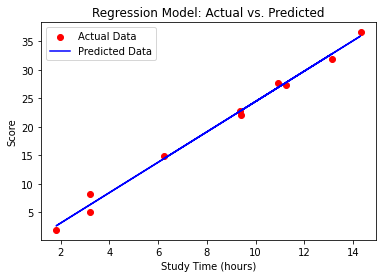

Predicted Score for 10 hours of study time: 24.45


/home/Student/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a synthetic training dataset
np.random.seed(42)
study_time = np.random.uniform(1, 15, 10)  # Study-time in hours
score = 2.5 * study_time + np.random.normal(0, 1.5, 10)  # Linear relation with noise

data = pd.DataFrame({'StudyTime': study_time, 'Score': score})

# Display the training data
print(data)

# Extract features (X) and target (y)
X = data[['StudyTime']]
y = data['Score']

# Build the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (intercept and slope)
intercept = model.intercept_
slope = model.coef_[0]

print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# Plot the data and predictions
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred, color='blue', label='Predicted Data')
plt.xlabel('Study Time (hours)')
plt.ylabel('Score')
plt.title('Regression Model: Actual vs. Predicted')
plt.legend()
plt.show()

# Test the model to predict score for a study time of 10 hours
study_time_new = 10
score_predicted = model.predict([[study_time_new]])
print("Predicted Score for {} hours of study time: {:.2f}".format(study_time_new, score_predicted[0]))
